# Link to Raw algorithm code

https://github.com/aymankhan2003/ayman-machinelearningblog.github.io/blob/main/posts/linearregression/linearregression.py

# Analytical Fit Method

In [ ]:
def fit_analytic(self, X, y):
        X_ = self.pad(X)
        self.w = np.linalg.inv(X_.T@X_)@X_.T@y

An analytical solution for fitting a linear regression model is implemented in the code. It accepts a feature matrix X and a target variable vector y as input. To account for the intercept term, the code adds a column of ones to the feature matrix X. It then uses the normal equation to calculate the weights of the linear regression model, yielding an analytical solution. Inverting the product of the transposed padded feature matrix, the padded feature matrix, and the target variable vector yields the weights. The weights obtained are saved in the variable self.w. 

# Gradient Fit Method

In [ ]:
def fit_gradient(self, X, y, max_iter, alpha):
        X_ = self.pad(X)
        self.w = np.random.rand(X_.shape[1])
        self.score_history = []
        
        P = X_.T@X_
        q = X_.T@y
        for _ in range(max_iter):
            gradient = (P@self.w - q)
            self.w -= alpha * gradient
            self.score_history.append(self.score(X, y))

For fitting a linear regression model, the code uses a gradient descent algorithm. It accepts a feature matrix X and a target variable vector y as input. Using the gradient of the cost function, the algorithm iteratively updates the weights of the linear regression model. To account for the intercept term, the padded feature matrix X_ is computed by adding a column of ones to X. The weights are randomly assigned, and the algorithm iterates a set number of times. It calculates the gradient, updates the weights, and stores the training score at each iteration. The score method is used to compute the training score.

### The following function will create both testing and validation data

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

### Generate data with the following code

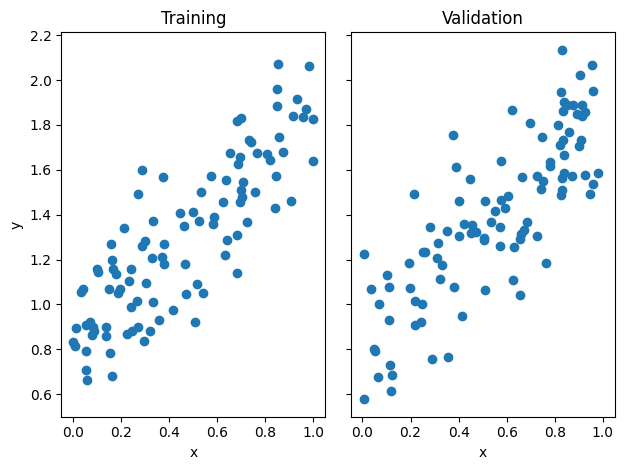

In [3]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

### Using Linear Regression on sample data

In [4]:
from linearregression import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.7172
Validation score = 0.6621


### Estimated Weight Vector

In [5]:
LR.w

array([1.00952437, 0.83414312])

### Getting the same value for the weight vector using gradient descent 

In [6]:
LR2 = LinearRegression()

LR2.fit(X_train, y_train, method = "gradient", alpha = 0.01, max_iter = 100)
LR2.w

array([1.00945598, 0.83417674])

### Seeing how the score changed over time and because we’re not using stochastic gradient descent, the score should increase monotonically in each iteration, and it does!

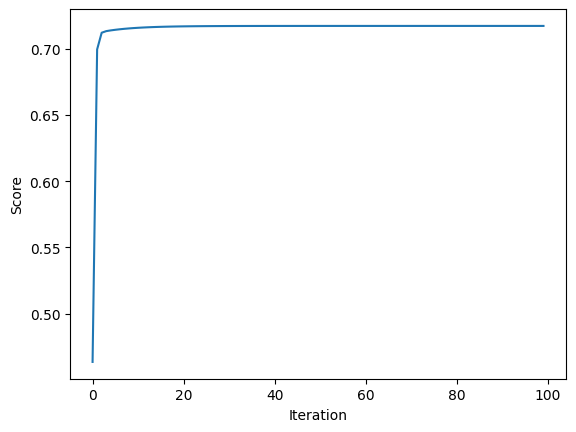

In [7]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# Experiment

#### An experiment in which p_features, the number of features used, is increased, while holding n_train, the number of training points, constant.

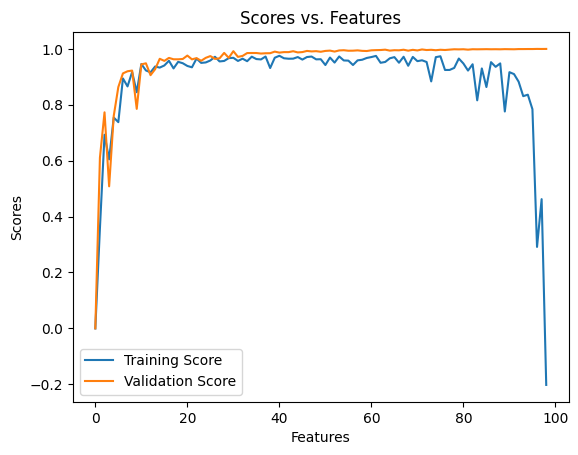

In [12]:
n_train = 100
n_val = 100
noise = 0.2

trainingscore = []
validationscore = []

LR = LinearRegression()
for p_features in range(n_train - 1):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR.fit(X_train, y_train)
    trainingscore.append(LR.score(X_val, y_val))
    validationscore.append(LR.score(X_train, y_train))

# plot it
plt.plot(trainingscore, label = "Training Score")
plt.plot(validationscore, label = "Validation Score")
plt.legend(loc='best')
labels = plt.gca().set(title = "Scores vs. Features", xlabel = "Features", ylabel = "Scores")
plt.show()

Looking at both scores, we can see that as both approach the score of 1.0, they start to cluster in a straight line and slowly the training score starts to decrease, indicating there could be some overfitting within the data. This means that as our model works on the training data it learns too much, while also failing to properly set upon the validation data.

# LASSO Experiment

In [13]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.01)

### Fitting this model on some data and checking the coefficients

In [14]:
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

Lasso(alpha=0.01)

### The score on the validation set is high, which might be different from what is found with pure linear regression.

In [15]:
L.score(X_val, y_val)

0.518963781877207

### Using LASSO

C:\Users\ayman\anaconda3\envs\ml-0451\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.010e-02, tolerance: 3.682e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ayman\anaconda3\envs\ml-0451\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e-02, tolerance: 3.682e-02
  model = cd_fast.enet_coordinate_descent(


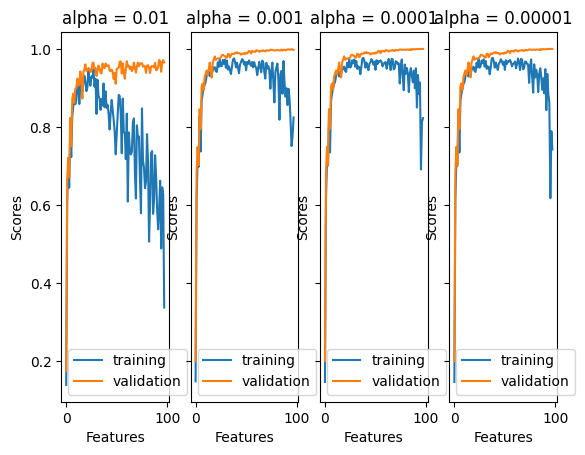

In [27]:
n_train = 100
n_val = 100
noise = 0.2

L1 = Lasso(alpha=0.001)
L2 = Lasso(alpha=0.0001)
L3 = Lasso(alpha=0.00001)

Ltrainingscore = []
Lvalidationscore = []

L1trainingscore = []
L1validationscore = []

L2trainingscore = []
L2validationscore = []

L3trainingscore = []
L3validationscore = []

for p_features in range(1, n_train - 1):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L.fit(X_train, y_train)
    Ltrainingscore.append(L.score(X_val, y_val))
    Lvalidationscore.append(L.score(X_train, y_train))
    L1.fit(X_train, y_train)
    L1trainingscore.append(L1.score(X_val, y_val))
    L1validationscore.append(L1.score(X_train, y_train))
    L2.fit(X_train, y_train)
    L2trainingscore.append(L2.score(X_val, y_val))
    L2validationscore.append(L2.score(X_train, y_train))
    L3.fit(X_train, y_train)
    L3trainingscore.append(L3.score(X_val, y_val))
    L3validationscore.append(L3.score(X_train, y_train))
# plot it
fig, axarr = plt.subplots(1, 4, sharex = True, sharey = True)

axarr[0].plot(Ltrainingscore, label = "training")
axarr[0].plot(Lvalidationscore, label = "validation")
axarr[0].legend(loc='best')
labs = axarr[0].set(title = "alpha = 0.01", xlabel = "Features", ylabel = "Scores")
axarr[1].plot(L1trainingscore, label = "training")
axarr[1].plot(L1validationscore, label = "validation")
axarr[1].legend(loc='best')
labs = axarr[1].set(title = "alpha = 0.001", xlabel = "Features", ylabel = "Scores")
axarr[2].plot(L2trainingscore, label = "training")
axarr[2].plot(L2validationscore, label = "validation")
axarr[2].legend(loc='best')
labs = axarr[2].set(title = "alpha = 0.0001", xlabel = "Features", ylabel = "Scores")
axarr[3].plot(L3trainingscore, label = "training")
axarr[3].plot(L3validationscore, label = "validation")
axarr[3].legend(loc='best')
labs = axarr[3].set(title = "alpha = 0.00001", xlabel = "Features", ylabel = "Scores")

Key Takeaway: As Learning rate increases, the LASSO algrotihm declines in the way it performs as we see a shift in paradigm in comparisons of learning rates from 0.01 to 0.00001. Overall, a smaller learning rate helps to improve the data in terms of overfitting as it reduces the declination of clusters.